## Parte 2. Análisis y reporte de desempeño del modelo sobre los datos.

In [1]:
# Cargar algunas librerías extras para el análisis y validación de los modelos implementados
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

c:\Users\fcsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\fcsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\fcsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Para este trabajo, se trabajará sobre la base de datos de breast cancer wisconsin dataset el cual es un dataset muy utilizado para análisis de modelos de clasificación binaria, el dataset se puede cargar desde nuestro jupyter notebook con scikit-learn, detalles acerca del dataset pueden ser consultados en el siguiente link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html 
El dataset puede ser descargado desde el siguiente link: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [2]:
# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


Debido a que utilizaremos GridSearchCV para el ajuste de algunos de nuestros hiperparámetros, aún no creamos nuestro validation set, este será creado con el objeto sklearn.model_selection.GridSearchCV() con el hiperparámetro cv y alimentando al objeto nuestro X_train y y_train, primeramente defineremos que el cross-validation (cv) sea igual a 2 para que se haga la evaluación de modelos unicamenente en un validation_set, después se evaluará también el modelo pero ahora usando cross-validation de varios "folds" para analizar los cambios de desempeño entre modelos.

#### Entrenando el modelo y evaluando el modelo en el conjunto de prueba sin ajuste de hiper-parámetros o uso de conjuntos de validación

In [4]:
# Entrenar un modelo de árbol de decisión
clf1 = DecisionTreeClassifier(random_state=23)
clf1.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred1 = clf1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

print("Accuracy en el conjunto de prueba:", accuracy1)
print("\nReporte de clasificación en el conjunto de prueba:\n", classification_report(y_test, y_pred1))
print("\nMatriz de confusión en el conjunto de prueba:\n", confusion_matrix(y_test, y_pred1))


Accuracy en el conjunto de prueba: 0.9298245614035088

Reporte de clasificación en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.94      0.96      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Matriz de confusión en el conjunto de prueba:
 [[34  5]
 [ 3 72]]


El modelo de arbol de decisión para clasificación implementado en scikit-learn con sus hiperparámetros por default tiene un buen rendimiento en general cuando es entrenado y evaluado con el train y test set respectivamente del dataset de breast_cancer, se tiene un buen porcentaje de precisión y recall , el accuracy nos indica que el modelo pudo clasificar de forma correcta las instancias del test set en el 93% de los casos, por otra parte se tuvieron 3 falsos negativos, bajo el contexto de los datos, esto es muy malo debido a que no se diagnostica cancer a pacientes con cancer, sería mejor tener un modelo que a primera instancia clasifique más falsos positivos que falsos negativos, como se había dicho anteriormente, también es importante verificar que el alto rendimiento del modelo no se deba al desequilibrio de clases. Se buscará indagar en esto con la exploración de distintos hiper-parámetros y tener conjuntos de datos de entrenamiento, validación y prueba.

#### Entrenando el modelo con train y validation set, luego evaluando el modelo con test set con ajuste de hiper-parámetros
Ahora para el ajuste de hiper-parámetros utilizaremos GridSearchCV, este método realiza una busqueda exhaustiva de todas las combinaciones posibles de hiperparámetros especificados, para nuestro caso variaremos 4 de los hiperparámetros existentes dentro de los objetos del tipo DecisionTreeClassifier(), los distintos modelos creados serán evaluados en una validation_set que se creará dentro del objeto GridSearchCV(), aquí el validation_set siempre será el mismo.

El validation set, será creado dentro de la función GridSearchCV, donde se dará únicamente el train set y de ahí se crearán dos folds para validar los datos conforme al accuracy, por eso no definimos un validation set anteriormente, GridSearchCV los crea para validar el accuracy de sus modelos.

In [5]:
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula de hiperparámetros para buscar los mejores valores
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=23), param_grid=param_grid, cv=2, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento y encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
clf2 = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy en el conjunto de prueba con mejores hiperparámetros:", accuracy2)


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy en el conjunto de prueba con mejores hiperparámetros: 0.9473684210526315


In [6]:
print("\nReporte de clasificación en el conjunto de prueba:\n", classification_report(y_test, y_pred2))
print("\nMatriz de confusión en el conjunto de prueba:\n", confusion_matrix(y_test, y_pred2))


Reporte de clasificación en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.96      0.96      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Matriz de confusión en el conjunto de prueba:
 [[36  3]
 [ 3 72]]


Aquí podemos observar una mejoría en el accuracy del modelo, pasando de 93% a 95%. Ahora se han reducido los falsos positivos a 1, cuando antes se tenían 3, aún y que esto presenta una mejoría en el accuracy del modelo, seguimos sin poder disminuir en número de falsos negativos que es lo que más nos interesa para este set de datos, veremos si utilizando validación cruzada podemos disminuir estos.

#### Entrenando y evaluando el modelo con cross-validation score para ajuste de hiper-parámetros
Por otra parte, para mitigar el riesgo de un modelo con overfitting, utilizaremos validación cruzada, esta técnica divide el conjunto de datos en varios "folds", para así poder entrenar el modelo con distintas combinaciones del set generadas por estos pliegues y tener estimaciones más confiables en datos desconocidos, esto debería de pasar al menos en teoría.  

In [7]:
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula de hiperparámetros para buscar los mejores valores
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=23), param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento y encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
clf3 = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred3 = clf3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy en el conjunto de prueba con mejores hiperparámetros:", accuracy3)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy en el conjunto de prueba con mejores hiperparámetros: 0.956140350877193


In [8]:
print("\nReporte de clasificación en el conjunto de prueba:\n", classification_report(y_test, y_pred3))
print("\nMatriz de confusión en el conjunto de prueba:\n", confusion_matrix(y_test, y_pred3))


Reporte de clasificación en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.97      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Matriz de confusión en el conjunto de prueba:
 [[37  2]
 [ 3 72]]


Podemos observar que la optimización de hiper-parámetros con cross-validation en este caso no ha mejorado el desempeño final, incluso ha obtenido los mismos resultados que el modelo que utilizaba los hiperparámetros por default y sin conjunto de validación, con esto se puede concluir varias cosas, por ejemplo que los parámetros iniciales del modelo erán adecuados para nuestro conjunto de datos, también puede que la calidad y cantidad de los datos hagan que los hiperparámetros del modelo no puedan ser optimizados adecuadamente, oque el modelo en si tenga limitaciones para aprender patrones más complejos de los datos.

### Diagnóstico y explicación del grado de sesgo, varianza y nivel de ajuste del modelo

#### Para el primer modelo, sin ajuste de hiperparámetros

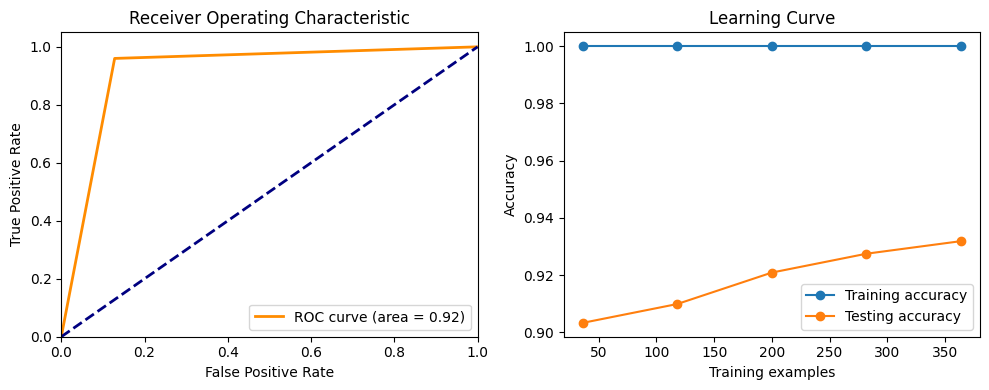

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.9298245614035088
Área bajo la curva ROC: 0.9158974358974359


In [9]:
# Evaluar el modelo en el conjunto de entrenamiento y prueba
y_train_pred = clf1.predict(X_train)
y_test_pred = clf1.predict(X_test)

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular las curvas ROC para evaluar la varianza
y_score = clf1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Calcular las curvas ROC para evaluar la varianza
y_score = clf1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Calcular la curva de aprendizaje para evaluar el sesgo
train_sizes, train_scores, test_scores = learning_curve(clf1, X_train, y_train, cv=5, scoring='accuracy')

# Plotea la curva ROC
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Plotea la curva de aprendizaje
plt.subplot(1, 2, 2)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Testing accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')
print(f'Área bajo la curva ROC: {roc_auc}')

# Analiza el sesgo, la varianza y el nivel de ajuste
#if train_accuracy > test_accuracy:
#    print('Sesgo (bias) alto')
#else:
#    print('Sesgo (bias) bajo')


In [10]:
scores = cross_val_score(clf1, X, y, cv=5)

#### Segundo modelo con ajuste de hiperparámetros sin validación cruzada

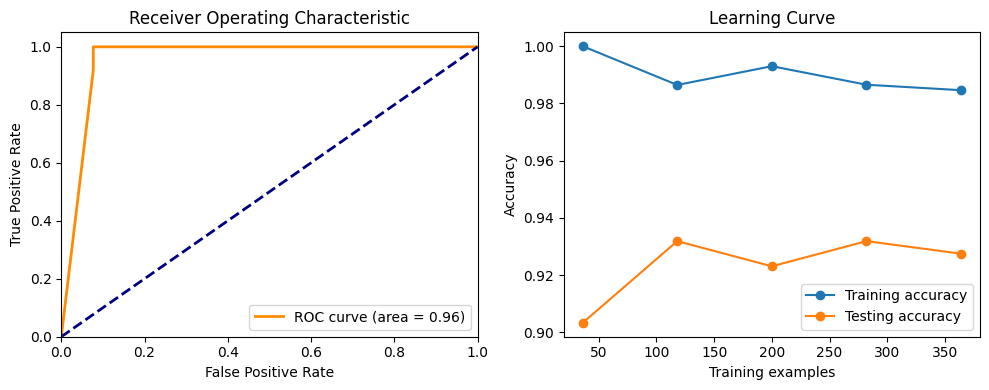

Precisión en el conjunto de entrenamiento: 0.9846153846153847
Precisión en el conjunto de prueba: 0.9473684210526315
Área bajo la curva ROC: 0.9584615384615385


In [11]:
# Evaluar el modelo en el conjunto de entrenamiento y prueba
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular las curvas ROC para evaluar la varianza
y_score = clf1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Calcular las curvas ROC para evaluar la varianza
y_score = clf2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Calcular la curva de aprendizaje para evaluar el sesgo
train_sizes, train_scores, test_scores = learning_curve(clf2, X_train, y_train, cv=5, scoring='accuracy')

# Plotea la curva ROC
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Plotea la curva de aprendizaje
plt.subplot(1, 2, 2)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Testing accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')
print(f'Área bajo la curva ROC: {roc_auc}')


#if roc_auc < 0.5:
#    print('Varianza alta')
#else:
#    print('Varianza baja')
#
#if train_accuracy == test_accuracy:
#    print('Ajuste perfecto')
#elif train_accuracy > test_accuracy:
#    print('Sobreajuste (overfitting)')
#else:
#    print('Subajuste (underfitting)')

#### Para el tercer modelo con cross-validation y ajuste de hiperparámetros

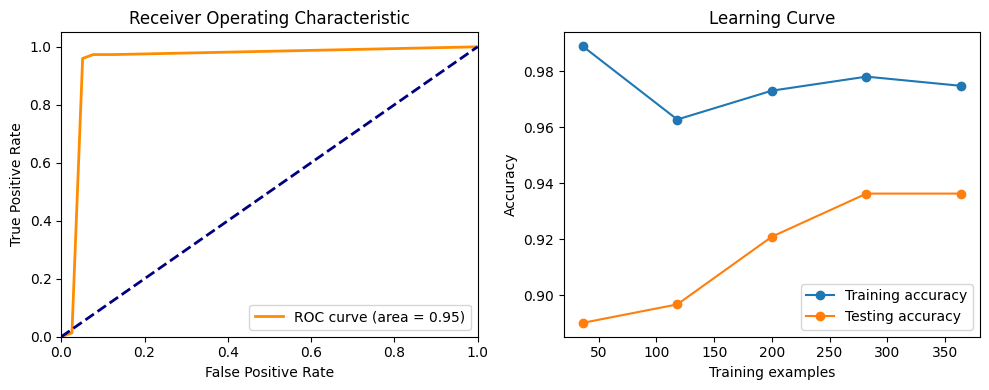

Precisión en el conjunto de entrenamiento: 0.9736263736263736
Precisión en el conjunto de prueba: 0.956140350877193
Área bajo la curva ROC: 0.9475213675213675


In [12]:
# Evaluar el modelo en el conjunto de entrenamiento y prueba
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular las curvas ROC para evaluar la varianza
y_score = clf3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Calcular las curvas ROC para evaluar la varianza
y_score = clf3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Calcular la curva de aprendizaje para evaluar el sesgo
train_sizes, train_scores, test_scores = learning_curve(clf3, X_train, y_train, cv=5, scoring='accuracy')

# Plotea la curva ROC
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Plotea la curva de aprendizaje
plt.subplot(1, 2, 2)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Testing accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')
print(f'Área bajo la curva ROC: {roc_auc}')

# Analiza el sesgo, la varianza y el nivel de ajuste
#if train_accuracy > test_accuracy:
#    print('Sesgo (bias) alto')
#else:
#    print('Sesgo (bias) bajo')

#if roc_auc < 0.5:
#    print('Varianza alta')
#else:
#    print('Varianza baja')
#
#if train_accuracy == test_accuracy:
#    print('Ajuste perfecto')
#elif train_accuracy > test_accuracy:
#    print('Sobreajuste (overfitting)')
#else:
#    print('Subajuste (underfitting)')

### Modelo a escoger
Para los siguientes análisis se eligirá un modelo en particular de acuerdo a su desempeño, reetomando, se crearon tres modelos:
- clf1: Primer modelo con parámetros default y entrenado sin conjunto de validación.
- clf2: Segundo modelo con hiperparámetros optimizados de acuerdo al accuracy obtenido con el validation set.
- clf3: Tercer y último modelo creado con hiperparámetros optimizados ussando cross-validation con 5 folds.

Al analizar el desempeño de cada uno de los modelos observamos que los tres tienen accuracies muy similares, sin embargo, se considera que el accuracy promedio obtenido con el cross-validation score del tercer modelo es muy robusto, donde cada uno de los testing accuracies es no menor a alrededor del 89%, teniendo un 95% de accuracy promedio.

#### Acerca del sesgo del modelo


In [13]:
pd.Series(y_test).value_counts() / len(y_test)


1    0.657895
0    0.342105
Name: count, dtype: float64

Podemos ver como las clases están desbalanceadas, sería preferente tener un balanceo de clases para identificar si el modelo tiene un sesgo hacia cierta clase, para este caso, hay que identificar si debido al desbalanceo de clases, el modelo tiene cierta tendencia hacia la clase mayoritaria.

In [14]:
# Porcentaje de clases, clasificadas correctamente de acuerdo a verdaderos positivos y negativos
print("Porcentaje de verdaderos positivos correctamente clasificados: ",confusion_matrix(y_test, y_pred3)[0][0]/pd.Series(y_test).value_counts()[0])
print("Porcentaje de verdaderos negativos correctamente clasificados: ", confusion_matrix(y_test, y_pred3)[1][1]/pd.Series(y_test).value_counts()[1])



Porcentaje de verdaderos positivos correctamente clasificados:  0.9487179487179487
Porcentaje de verdaderos negativos correctamente clasificados:  0.96


Podemos ver que a pesar de que hay un desbalanceo en las clases, el porcentaje de accuracy por tipo de clase es muy similar, lo cual es un indicio de tener bajo sesgo, el modelo es capaz de identificar ambos tipos de clases aun y que tenga menos información acerca de una clase.

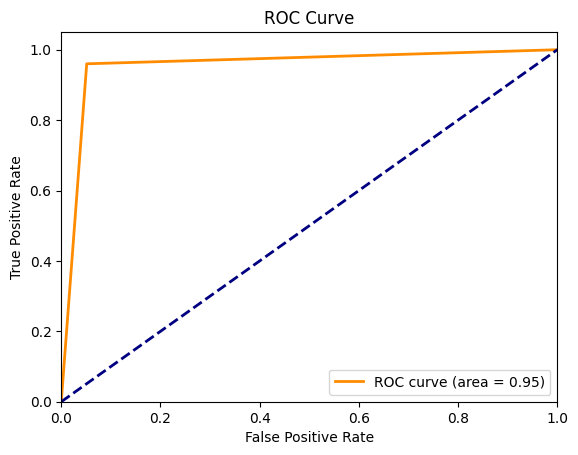

In [15]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Un AUC del 0.95 implica que el modelo tiene una alta capacidad para discriminar entre clases y minimizar los errores de clasificación. Por lo tanto, en términos generales, un alto AUC y una curva ROC que cubre el 95% del área son indicios de un bajo sesgo en el modelo.

##### Grado de varianza
Para identificar el grado de varianza se hará uso del cross-validation score, esto para analizar el desempeño del modelo al ser entrenado y evaluado con distintos conjuntos de datos, se evaluara el accuracy score de cada una de las divisiones de datos creadas y se promediara el accuracy general.


In [16]:
score = cross_val_score(clf3, X_train, y_train, cv=5)
print("Accuracy por conjunto de entrenamiento y prueba: ",score)
print("Media: ", score.mean())
print("Desviación Estandar: ", score.std())

Accuracy por conjunto de entrenamiento y prueba:  [0.9010989  0.94505495 0.91208791 0.96703297 0.95604396]
Media:  0.9362637362637363
Desviación Estandar:  0.02544139978635215


Podemos observar que ante 5 distintos conjuntos de datos de entrenamiento y evaluación, el accuracy generado por modelo no es menor a 90%, teniendo 93% de accuracy promedio, por lo que el accuracy varía muy poco.

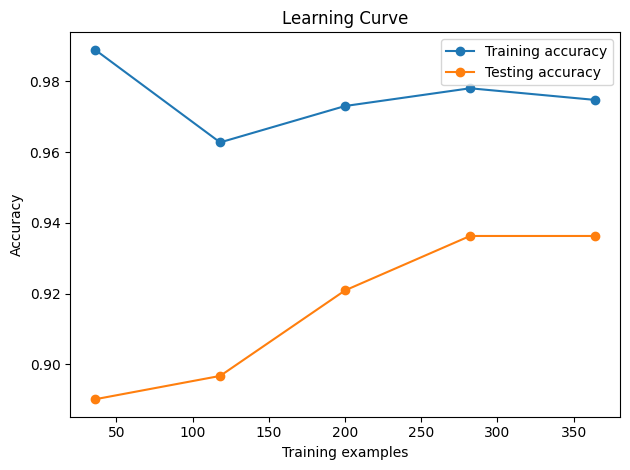

Precisión en el conjunto de entrenamiento: 0.9736263736263736
Precisión en el conjunto de prueba: 0.956140350877193


In [17]:
# Evaluar el modelo en el conjunto de entrenamiento y prueba
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular la curva de aprendizaje para evaluar el sesgo
train_sizes, train_scores, test_scores = learning_curve(clf3, X_train, y_train, cv=5, scoring='accuracy')

# Plotea la curva de aprendizaje
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Testing accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')


Podemos ver como los niveles de testing accuracy son similares en la curva de aprendizaje, esto implica que hay poca varianza en los modelos hechos con distintos sets de entrenamiento y prueba, con lo cual concluimos que la varianza en este modelo con el dataset usado es baja.

#### Nivel de ajuste del modelo

Para determinar si el nivel de ajuste de nuestro modelo es del tipo underfit, fit o overfit, haremos uso del set de datos de prueba, el modelo clf3 se entreno con cross-validation unicamente sobre los datos de prueba, por lo que los datos de test son instancias nuevas no antes vistas por el modelo, el análisis de resultados sobre estos datos nos ayudará a determinar si el ajuste de entrenamiento del modelo es bueno.

In [19]:
print("\nReporte de clasificación en el conjunto de prueba:\n", classification_report(y_test, y_pred3))
print("\nMatriz de confusión en el conjunto de prueba:\n", confusion_matrix(y_test, y_pred3))


Reporte de clasificación en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.97      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Matriz de confusión en el conjunto de prueba:
 [[37  2]
 [ 3 72]]


Podemos observar aquí que el modelo no sufre de overfitting debido a que el rendimiento no es alto en el conjunto de entrenamiento y bajo en el conjunto de prueba, como se puede observar en la learning curve del modelo mostrada anteriormente, el modelo muestra un alto rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba, lo que sugiere que está generalizando bien a datos no vistos previamente. Por otro lado, no se tiene underfitting debido a que se mostraría un rendimiento deficiente en el conjunto de prueba, que no es el caso, ya que se obtuvo un accuracy de 96% sobre los datos de prueba.

#### Técnicas de regularización para mejorar desempeño del modelo
Crearemos un nuevo modelo que tenga en cuenta técnicas de regularización para un arbol de decisión como lo pueden ser la poda para eliminar subárboles que no proporcionan una mejora significativa en el rendimiento del modelo, esta se tratará por medio del argumento ccp_alpha de la clase sklearn.tree.DecisionTreeClassifier().

In [25]:
# Definir una cuadrícula de hiperparámetros para buscar los mejores valores
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=23), param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento y encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
clf4 = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred4 = clf4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy en el conjunto de prueba con mejores hiperparámetros:", accuracy4)

Mejores hiperparámetros: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy en el conjunto de prueba con mejores hiperparámetros: 0.9298245614035088


La poda y otras técnicas de regularización en modelos de árboles de decisión tienen como objetivo principal mejorar la capacidad de generalización del modelo al controlar su complejidad. Esto resulta en modelos más estables, interpretables y efectivos en una variedad de aplicaciones de aprendizaje automático.

En nuestro caso, se encontró que el mejor desempeño del modelo se tenía cuando no había una tasa de poda, se mantiene el modelo original, esta tasa de poda depende de las necesidades específicas del problema.